In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mne
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


creating a list with the paths of the adhd files

In [3]:
ADHD_files_path=glob('/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/*.fif')
ADHD_files_path_50 = ADHD_files_path[:50]
print(len(ADHD_files_path_50))

50


creating a list with the paths of the control files

In [4]:
control_files_path=glob('/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/*.fif')
print(len(control_files_path))

60


creating a function to read the data and create a fixed epochs of duration 10 sec and overlapping of 75%

In [6]:
def read_data(file_path):
    datax=mne.io.read_raw_fif(file_path,preload=True)
    epochs=mne.make_fixed_length_epochs(datax,duration=10,overlap=0.75)
    epochs=epochs.get_data() #turning the epochs to arrays
    return epochs

In [7]:
#reading the data of both ADHD and control and saving them in an array
NON_ADHD_epochs_array=[read_data(subject) for subject in control_files_path]
ADHD_epochs_array=[read_data(subject) for subject in ADHD_files_path_50]

Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v50p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16242 =      0.000 ...   126.891 secs
Ready.


/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v50p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)


Reading 0 ... 16242  =      0.000 ...   126.891 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v110.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16552 =      0.000 ...   129.312 secs
Ready.
Reading 0 ... 16552  =      0.000 ...   129.312 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/C

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v110.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v48p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
17 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 17 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v44p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11396 =      0.000 ...    89.031 secs
Ready.
Reading 0 ... 11396  =      0.000 ...    89.031 secs...
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v121.fif...
Isotrak not found
    Read a total 

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v44p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v121.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Reading 0 ... 25662  =      0.000 ...   200.484 secs...
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 21 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v129.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11211 =      0.000 ...    87.586 secs
Ready.
Reading 0 ... 11211  =      0.000 ...    87.586 secs...
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Con

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v129.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v302.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 19 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v115.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15654 =      0.000 ...   122.297 secs
Ready.
Reading 0 ... 15654  =      0.000 ...   122.297 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v60p.fif...
Isotrak not found
    Read a tota

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v115.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v60p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19304 =      0.000 ...   150.812 secs
Ready.
Reading 0 ... 19304  =      0.000 ...   150.812 secs...
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v107.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19797 =      0.000 ...   154.664 secs
Ready.
Reading 0 ... 19797  =      0.000 ...   154.664 secs...
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded R

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v107.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v123.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v112.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15946 =      0.000 ...   124.578 secs
Ready.
Reading 0 ... 15946  =      0.000 ...   124.578 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v43p.fif...
Isotrak not found
    Read a tota

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v112.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v43p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13921 =      0.000 ...   108.758 secs
Ready.
Reading 0 ... 13921  =      0.000 ...   108.758 secs...
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v310.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17796 =      0.000 ...   139.031 secs
Ready.
Reading 0 ... 17796  =      0.000 ...   139.031 secs...
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded R

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v310.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v114.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v108.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19029 =      0.000 ...   148.664 secs
Ready.
Reading 0 ... 19029  =      0.000 ...   148.664 secs...
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v54p.fif...
Isotrak not found
    Read a tota

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v108.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v54p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

1 projection items activated
Using data from preloaded Raw for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v300.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 25988 =      0.000 ...   203.031 secs
Ready.
Reading 0 ... 25988  =      0.000 ...   203.031 secs...
Not setting metadata
21 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 21 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v41p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12503 =      0.000 ...    97.680 secs

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v300.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v41p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 22263 =      0.000 ...   173.930 secs
Ready.
Reading 0 ... 22263  =      0.000 ...   173.930 secs...
Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 18 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v56p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14142 =      0.000 ...   110.484 secs
Ready.
Reading 0 ... 14142  =      0.000 ...   110.484 secs...
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded R

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v56p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v46p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14212 =      0.000 ...   111.031 secs
Ready.
Reading 0 ... 14212  =      0.000 ...   111.031 secs...
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 11 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v52p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13886 =      0.000 ...   108.484 secs
Ready.
Reading 0 ... 13886  =      0.000 ...   108.484 secs...
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded R

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v52p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v42p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v127.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 14724 =      0.000 ...   115.031 secs
Ready.
Reading 0 ... 14724  =      0.000 ...   115.031 secs...
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 12 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v47p.fif...
Isotrak not found
    Read a tota

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v127.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v47p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v51p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 7986 =      0.000 ...    62.391 secs
Ready.
Reading 0 ... 7986  =      0.000 ...    62.391 secs...
Not setting metadata
6 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 6 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v53p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19125 =      0.000 ...   149.414 secs
Ready.
Reading 0 ... 19125  =      0.000 ...   149.414 secs...
Not setting metadata
16 matching events found
N

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v51p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v53p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Not setting metadata
18 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 18 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v308.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17028 =      0.000 ...   133.031 secs
Ready.
Reading 0 ... 17028  =      0.000 ...   133.031 secs...
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v298.fif...
Isotrak not found
    Read a tota

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v308.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v298.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v306.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18304 =      0.000 ...   143.000 secs
Ready.
Reading 0 ... 18304  =      0.000 ...   143.000 secs...
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 15 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v59p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16516 =      0.000 ...   129.031 secs
Ready.
Reading 0 ... 16516  =      0.000 ...   129.031 secs...
Not setting metadata
13 matching events fou

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v306.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240509T211233Z-001/Control_fif/v59p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/Control_fif-20240

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 16047 =      0.000 ...   125.367 secs
Ready.
Reading 0 ... 16047  =      0.000 ...   125.367 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v196.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 13398 =      0.000 ...   104.672 secs
Ready.
Reading 0 ... 13398  =      0.000 ...   104.672 secs...
Not setting metadata
11 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v196.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v32p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v227.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 28083 =      0.000 ...   219.398 secs
Ready.
Reading 0 ... 28083  =      0.000 ...   219.398 secs...
Not setting metadata
23 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 23 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v20p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v227.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v20p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 11682 =      0.000 ...    91.266 secs
Ready.
Reading 0 ... 11682  =      0.000 ...    91.266 secs...
Not setting metadata
9 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 9 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v181.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 10671 =      0.000 ...    83.367 secs
Ready.
Reading 0 ... 10671  =      0.000 ...    83.367 secs...
Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 8 

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v181.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v209.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15779 =      0.000 ...   123.273 secs
Ready.
Reading 0 ... 15779  =      0.000 ...   123.273 secs...
Not setting metadata
13 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 13 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v173.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24244 =      0.000 ...   189.406 secs
Ready.
Reading 0 ... 24244  =      0.000 ...   189.406 secs...
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v173.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v18p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 20176 =      0.000 ...   157.625 secs
Ready.
Reading 0 ... 20176  =      0.000 ...   157.625 secs...
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v244.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 39033 =      0.000 ...   304.945 secs
Ready.
Reading 0 ... 39033  =      0.000 ...   304.945 secs...
Not setting metadata
32 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v244.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v27p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 24698 =      0.000 ...   192.953 secs
Ready.
Reading 0 ... 24698  =      0.000 ...   192.953 secs...
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 20 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v14p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17565 =      0.000 ...   137.227 secs
Ready.
Reading 0 ... 17565  =      0.000 ...   137.227 secs...
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v14p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v29p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

1 projection items activated
Using data from preloaded Raw for 36 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v37p.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 9289 =      0.000 ...    72.570 secs
Ready.
Reading 0 ... 9289  =      0.000 ...    72.570 secs...
Not setting metadata
7 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 7 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v200.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12742 =      0.000 ...    99.547 secs
Ready.
Reading 

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v37p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v200.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 34194 =      0.000 ...   267.141 secs
Ready.
Reading 0 ... 34194  =      0.000 ...   267.141 secs...
Not setting metadata
28 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 28 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v198.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 19624 =      0.000 ...   153.312 secs
Ready.
Reading 0 ... 19624  =      0.000 ...   153.312 secs...
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v198.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v263.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12261 =      0.000 ...    95.789 secs
Ready.
Reading 0 ... 12261  =      0.000 ...    95.789 secs...
Not setting metadata
10 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 10 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v284.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 15386 =      0.000 ...   120.203 secs
Ready.
Reading 0 ... 15386  =      0.000 ...   120.203 secs...
Not setting metadata
12 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v284.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v21p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 29220 =      0.000 ...   228.281 secs
Ready.
Reading 0 ... 29220  =      0.000 ...   228.281 secs...
Not setting metadata
24 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 24 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v270.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 23684 =      0.000 ...   185.031 secs
Ready.
Reading 0 ... 23684  =      0.000 ...   185.031 secs...
Not setting metadata
19 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v270.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v24p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v274.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 17326 =      0.000 ...   135.359 secs
Ready.
Reading 0 ... 17326  =      0.000 ...   135.359 secs...
Not setting metadata
14 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 14 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v213.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 12356 =      0.000 ...    96.531 secs
Ready.
Reading 0 ... 12356  =      0.000 ...    96.531 secs...
Not setting metadata
10 matching events found
No baseli

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v274.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v213.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Reading 0 ... 20137  =      0.000 ...   157.320 secs...
Not setting metadata
16 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 16 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v219.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 27160 =      0.000 ...   212.188 secs
Ready.
Reading 0 ... 27160  =      0.000 ...   212.188 secs...
Not setting metadata
22 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 22 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v219.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v28p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 9897 =      0.000 ...    77.320 secs
Ready.
Reading 0 ... 9897  =      0.000 ...    77.320 secs...
Not setting metadata
8 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 8 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v265.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18392 =      0.000 ...   143.688 secs
Ready.
Reading 0 ... 18392  =      0.000 ...   143.688 secs...
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 15 

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v265.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v19p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 21375 =      0.000 ...   166.992 secs
Ready.
Reading 0 ... 21375  =      0.000 ...   166.992 secs...
Not setting metadata
17 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 17 events and 1280 original time points ...
0 bad epochs dropped
Opening raw data file /kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v183.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 19) active
    Range : 0 ... 18594 =      0.000 ...   145.266 secs
Ready.
Reading 0 ... 18594  =      0.000 ...   145.266 secs...
Not setting metadata
15 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for

/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v183.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001/ADHD_fif/v40p.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  datax=mne.io.read_raw_fif(file_path,preload=True)
/tmp/ipykernel_34/3836025844.py:2: RuntimeWarning: This filename (/kaggle/input/adhd-classification-data/ADHD_fif-20240509T211140Z-001

In [8]:
#crating target values for each data
NON_ADHD_epochs_labels=[len(i)*[0] for i in NON_ADHD_epochs_array]
ADHD_epochs_labels=[len(i)*[1] for i in ADHD_epochs_array]
print(len(NON_ADHD_epochs_labels),len(ADHD_epochs_labels))

60 50


In [9]:
#adding data of both adhd with control in one array
data_list=NON_ADHD_epochs_array+ADHD_epochs_array
#adding the target values of both adhd and control with eachother
label_list=NON_ADHD_epochs_labels+ADHD_epochs_labels
print(len(data_list),len(label_list))

110 110


In [11]:
#stacking the values beside eachother
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape)

(1608, 1280, 19) (1608,)


In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, MaxPool1D, GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam

2024-05-18 12:25:07.764535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 12:25:07.764625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 12:25:07.850856: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
#creating cnn model suitable for the data

model = Sequential([
        layers.Conv1D(filters=8, kernel_size=3, strides=1, input_shape=(1280, 19)), # 1
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.MaxPool1D(pool_size=2, strides=2), # 2
        layers.Conv1D(filters=16, kernel_size=3, strides=1), # 3
        layers.LeakyReLU(),
        layers.MaxPool1D(pool_size=2, strides=2), # 4
        layers.Dropout(0.5),
        layers.Conv1D(filters=32, kernel_size=3, strides=1), # 5
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 6
        layers.Dropout(0.5),
        layers.Conv1D(filters=64, kernel_size=3, strides=1), # 7
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 8
        layers.Conv1D(filters=128, kernel_size=3, strides=1), # 9
        layers.LeakyReLU(),
        layers.AveragePooling1D(pool_size=2, strides=2), # 10
        layers.Conv1D(filters=256, kernel_size=3, strides=1), # 11
        layers.LeakyReLU(),
        layers.GlobalAveragePooling1D(), # 12
        layers.Dense(128), # 13
        layers.LeakyReLU(),
        layers.Dense(64), # 14
        layers.LeakyReLU(),
        layers.Dense(1, activation='sigmoid') # 15
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 1278, 8)        │           464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1278, 8)        │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 1278, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 639, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 637, 16)        │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 637, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 318, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 318, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 316, 32)        │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 316, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_3             │ (None, 158, 32)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 158, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 156, 64)        │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 156, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_4             │ (None, 78, 64)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 76, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 76, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_5             │ (None, 38, 128)        │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 36, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 36, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 173,153 (676.38 KB)

 Trainable params: 173,137 (676.32 KB)

 Non-trainable params: 16 (64.00 B)

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split dataset into train, validation, and test sets
train_features, test_val_features, train_labels, test_val_labels = train_test_split(data_array, label_array, test_size=0.2, random_state=42)
val_features, test_features, val_labels, test_labels = train_test_split(test_val_features, test_val_labels, test_size=0.5, random_state=42)

# Standardize features
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features.reshape(-1, train_features.shape[-1])).reshape(train_features.shape)
val_features = scaler.transform(val_features.reshape(-1, val_features.shape[-1])).reshape(val_features.shape)
test_features = scaler.transform(test_features.reshape(-1, test_features.shape[-1])).reshape(test_features.shape)

In [23]:



# Train the model
model.fit(train_features, train_labels, epochs=75, batch_size=100, validation_data=(val_features, val_labels))



Epoch 1/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 455ms/step - accuracy: 0.4768 - loss: 0.6946 - val_accuracy: 0.5652 - val_loss: 0.6850
Epoch 2/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5220 - loss: 0.6858 - val_accuracy: 0.5963 - val_loss: 0.6564
Epoch 3/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5473 - loss: 0.6696 - val_accuracy: 0.5901 - val_loss: 0.6457
Epoch 4/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5682 - loss: 0.6640 - val_accuracy: 0.6211 - val_loss: 0.6267
Epoch 5/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6550 - loss: 0.6225 - val_accuracy: 0.6087 - val_loss: 0.6494
Epoch 6/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7284 - loss: 0.5803 - val_accuracy: 0.6087 - val_loss: 0.6528
Epoch 7/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7218 - loss: 0.5839 - val_accuracy: 0.7143 - val_loss: 0.5716
Epoch 8/75
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7423 - loss: 0.5293 - val_accuracy: 0.5963 -

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


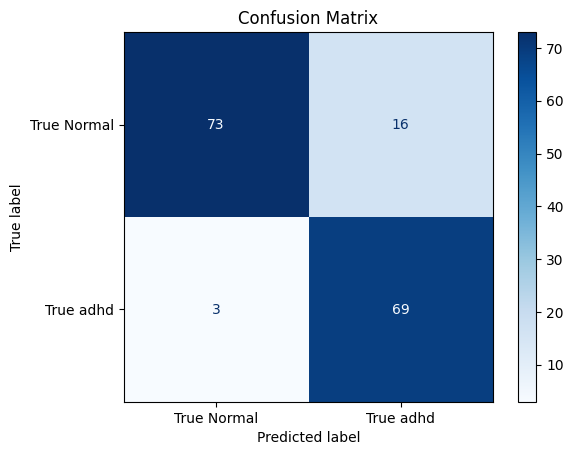

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.8545 - loss: 0.4250


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
# Make predictions on test set
predictions = model.predict(test_features)
binary_predictions = np.round(predictions).flatten()

# Calculate confusion matrix
cm = confusion_matrix(test_labels, binary_predictions)

# Plot confusion matrix
labels = ['Normal', 'adhd']  
display_labels = ['True ' + label for label in labels]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

accuracy=[]
# Calculate accuracy
accuracy.append(model.evaluate(test_features, test_labels)[1])

In [25]:
from sklearn.metrics import classification_report

# Calculate precision, recall, F1-score, and support
report = classification_report(test_labels, binary_predictions, target_names=['NORMAL', 'ADHD'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      NORMAL       0.96      0.82      0.88        89
        ADHD       0.81      0.96      0.88        72

    accuracy                           0.88       161
   macro avg       0.89      0.89      0.88       161
weighted avg       0.89      0.88      0.88       161



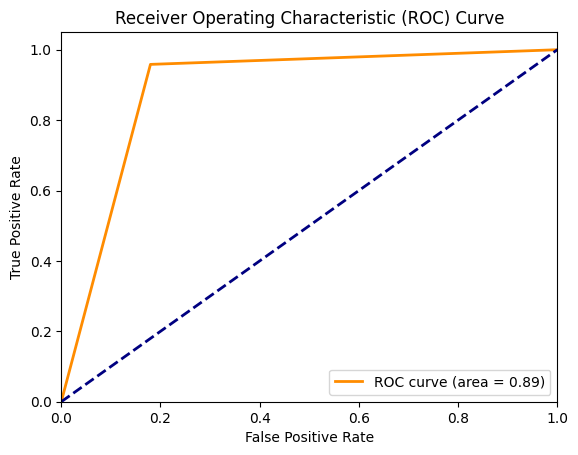

In [26]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_labels, binary_predictions)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()